# Imports
- Open this code on [Google Colab](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjYnPLoobf4AhWxs5UCHUYjDTcQFnoECAQQAQ&url=https%3A%2F%2Fresearch.google.com%2Fcolaboratory%2F&usg=AOvVaw38J01zt_Dlb6pQ1fe6FGrI) if you are not familiar with python or does not have python installed in your computer

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Function to create TUS plot
Run this cell and do not change anything on it

In [2]:
def Tus(injection_order, xcms_table, plot_title = 'Total Useful Signal', color = 'dark_red', 
        save_plot = True, figure_name = 'TUS.tif', figure_format = 'tif', figure_resolution = 300, directory = './'):
    
    """
    injection_order: Path to the injection order table - Must contain ONE column names 'samples' with the samples ordered according to the injection order
    xcms_table: Path to the xcms table. The first column should be named 'samples' and contain the sample names in the same format as the injection order table. The following columns should each contain one feature (m/z and retention time).
    plot_title: Title of the plot. Must be written between quotes (" ").
    color: Color of the plot. Supported values are: aquamarine, green, light_blue, dark_blue, orange, red, dark_red, magenta, pink, purple, brown and grey
    save_plot = If True, saves the plot as a file
    figure_name = File name. The name MUST contain the file extension
    figure_format = File format such as 'png', 'tif', 'jpeg' etc.
    figure_resolution = File resolution in dpi. If 'figure', the saved figure will have the same resolution as the one presented
    directory = Folder in which the plot will be saved
    
    """
        
    colors = {'aquamarine': 'Dark2',
              'green': 'YlGn_r', 
              'light_blue': 'Spectral_r',
              'dark_blue':'Blues_r' , 
              'orange': 'Wistia_r', 
              'red': 'Set1', 
              'dark_red': 'Reds_r', 
              'magenta': 'PuRd_r', 
              'pink': 'PiYG' , 
              'purple': 'Purples_r' , 
              'brown': 'Oranges_r', 
              'grey': 'Greys_r'}
    
    if color in colors.keys():       
        # loading the datasets
        order = pd.read_csv(injection_order)
        intensity_table = pd.read_csv(xcms_table)

        # reordering the intensity table
        ordered_table = pd.merge(order, intensity_table, how='outer')
        ordered_table['sum'] = ordered_table.sum(numeric_only=True, axis=1)

        # indexes to list
        index = ordered_table.index.tolist()

        # PLOT

        # figsize 
        plt.figure(figsize=(15,8))

        # theme
        custom_params = {"axes.spines.right": False, "axes.spines.top": False}
        sns.set_theme(style = 'ticks',rc=custom_params, palette=colors[color])

        ax = sns.scatterplot(x=index , y = ordered_table['sum'], alpha=0.7, s=80)

        # titles and axis labels
        ax.set_xlabel("Injection Order", fontsize = 13)
        ax.set_ylabel("Intensity", fontsize = 13)
        ax.set_title(plot_title, fontsize = 15);

        #     save plot
        if save_plot:
            plt.savefig(directory + figure_name, format = figure_format, dpi = figure_resolution)
            
        return plt.show()
    
    
    
    else: 
        print(f"Please enter a valid color. \nSupported values are: \n  {', '.join([*colors])}")


# Using the function to create the TUS plot



Below, there is an exemple on how to run the function in order to visualize and save thr TUS plot. To make your own plot, change the arguments accordingly


The arguments and how to use them are available below:

   **injection_order**: Path to the injection order table - Must contain ONE column names 'samples' with the samples ordered according to the injection order.
   
   **xcms_table**: Path to the xcms table. The first column should be named 'samples' and contain the sample names in the same format as the injection order table. The following columns should each contain one feature (m/z and retention time).
   
   **plot_title**: Title of the plot. Must be written between quotes (" ").
   
   **color**: Color of the plot. Supported values are: aquamarine, green, light_blue, dark_blue, orange, red, dark_red, magenta, pink, purple, brown and grey.
   
   **save_plot** = If True, saves the plot as a file.
   
   **figure_name** = File name. The name MUST contain the file extension.
   
   **figure_format** = File format such as 'png', 'tif', 'jpeg' etc.
   
   **figure_resolution** = File resolution in dpi. If 'figure', the saved figure will have the same resolution as the one presented.
   
   **directory** = Folder in which the plot will be saved.

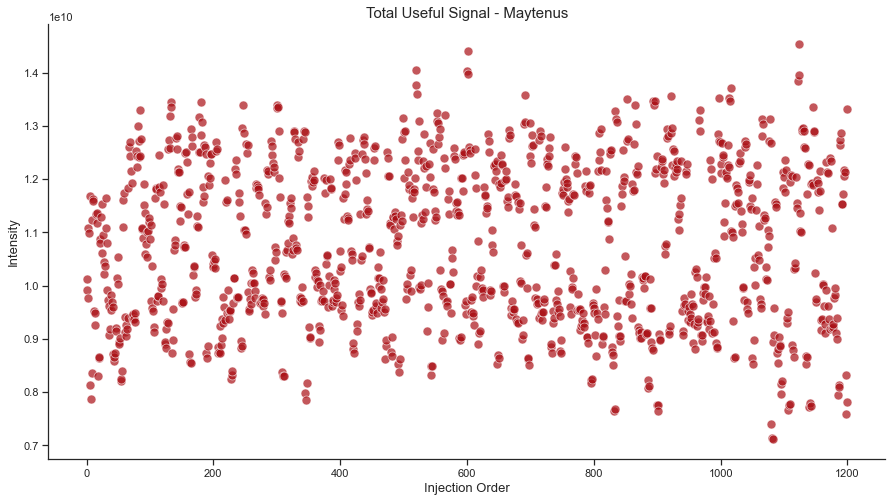

In [6]:
Tus('./injection_order.csv', 
    './TUS.csv', 
    plot_title = 'Total Useful Signal - Maytenus',
    color ='dark_red', 
    save_plot = True, 
    figure_name = 'TUS.tif', 
    figure_format = 'tif', 
    figure_resolution = 300, 
    directory = 'G:/2.LABMETAMASS/DOUTORADO/DADOS/maytenus/')